# <font color="red"> MBA em IA e Big Data</font>
## <span style="color:red">Curso 2 - Ciência de Dados, Aprendizado de Máquina e Mineração de Dados</span>

### <span style="color:darkred">Mineração de Dados</span>

#### Material de Apoio - Experimentos com Dados não Estruturados - Imagens (ver Vídeo)

*Ricardo M. Marcacini*<br>
*ICMC/USP São Carlos*

# Importando bibliotecas

In [ ]:
import pandas as pd
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer, util
from PIL import Image
from IPython.display import Image as ShowImage
from IPython.display import display
from os import listdir
from os.path import isfile, join
from sklearn.cluster import KMeans
import numpy as np

# Carregando base de dados

This dataset contains 8 outdoor scene categories: coast, mountain, forest, open country, street, inside city, tall buildings and highways.

There are 2600 color images, 256x256 pixels. 

Fonte: https://people.csail.mit.edu/torralba/code/spatialenvelope/


In [ ]:
!wget https://people.csail.mit.edu/torralba/code/spatialenvelope/spatial_envelope_256x256_static_8outdoorcategories.zip

In [ ]:
!unzip spatial_envelope_256x256_static_8outdoorcategories.zip

## Amostragem de 100 imagens para o exercício

Ver arquivo: imagens_parte10.zip

In [ ]:
!unzip imagens_parte10.zip

In [ ]:
mypath = 'images'
images = ['images/'+f for f in listdir(mypath) if isfile(join(mypath, f))]
images

['images/mountain_n860054.jpg',
 'images/street_par54.jpg',
 'images/insidecity_art1597.jpg',
 'images/mountain_n344080.jpg',
 'images/tallbuilding_urban787.jpg',
 'images/tallbuilding_city1.jpg',
 'images/opencountry_n291082.jpg',
 'images/forest_nat130.jpg',
 'images/tallbuilding_urban649.jpg',
 'images/opencountry_land388.jpg',
 'images/street_hexp3.jpg',
 'images/tallbuilding_art528.jpg',
 'images/opencountry_land645.jpg',
 'images/tallbuilding_art1717.jpg',
 'images/opencountry_land501.jpg',
 'images/highway_art874.jpg',
 'images/opencountry_n18012.jpg',
 'images/opencountry_moun8.jpg',
 'images/mountain_n18022.jpg',
 'images/tallbuilding_art945.jpg',
 'images/coast_nat284.jpg',
 'images/mountain_n841060.jpg',
 'images/forest_nat349.jpg',
 'images/mountain_n392090.jpg',
 'images/coast_nat479.jpg',
 'images/mountain_n213093.jpg',
 'images/highway_gre426.jpg',
 'images/opencountry_open38.jpg',
 'images/insidecity_par104.jpg',
 'images/forest_text39.jpg',
 'images/tallbuilding_art101

# Pré-processamento das Imagens

Vamos usar um modelo pré-treinado para extrair características das imagens.

O modelo que iremos utilizar é o CLIP.

https://openai.com/blog/clip/


In [ ]:
image_feature_extractor = SentenceTransformer('clip-ViT-B-32')

### Testando a representação

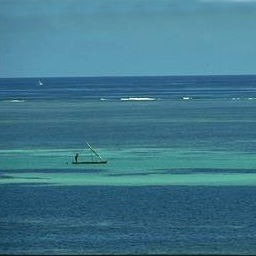

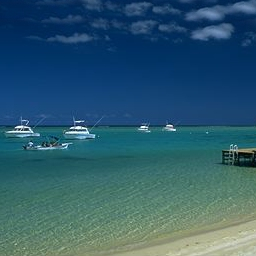

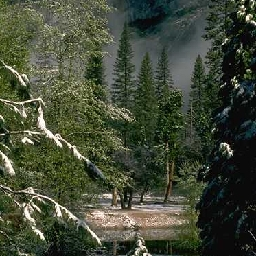

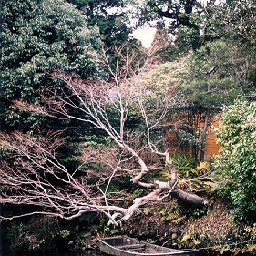

In [ ]:
img1 = 'images/coast_land108.jpg'
img2 = 'images/coast_land277.jpg'
img3 = 'images/forest_nat349.jpg'
img4 = 'images/forest_nat130.jpg'
list_img = [img1,img2,img3,img4]
a = ShowImage(filename=img1,width=256) 
b = ShowImage(filename=img2,width=256) 
c = ShowImage(filename=img3,width=256) 
d = ShowImage(filename=img4,width=256) 
display(a,b,c,d)

In [ ]:
img1_features = image_feature_extractor.encode(Image.open(img1))
img2_features = image_feature_extractor.encode(Image.open(img2))
img3_features = image_feature_extractor.encode(Image.open(img3))
img4_features = image_feature_extractor.encode(Image.open(img4))

In [ ]:
# vamos apenas visualizar as features das imagens
X = [img1_features,img2_features,img3_features,img4_features]
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.286561,-0.028678,0.565179,0.276345,0.226165,-0.350900,-0.248303,0.108115,0.203703,-0.194091,...,-0.292413,0.187807,0.411179,-0.675096,-0.097021,-0.203619,0.168184,0.689653,0.073344,0.148400
1,0.104209,0.019051,0.120636,-0.071632,0.176488,-0.321695,0.242475,0.068706,0.419644,-0.254297,...,-0.253910,-0.221548,0.097845,-0.257571,-0.023222,-0.450091,0.238820,0.701388,0.067593,-0.079930
2,-0.335940,0.341488,0.179936,0.069372,-0.176146,-0.394033,0.046987,0.365007,-0.420334,0.268057,...,-0.244754,0.139437,1.048534,-0.050708,0.145000,-0.395889,0.180344,0.361269,-0.374635,0.251049
3,-0.225410,0.579991,0.128556,-0.056217,-0.316996,-0.375516,-0.130385,0.235772,-0.063844,0.044121,...,0.206045,0.310440,1.288720,-0.343692,0.101599,-0.121079,0.038522,0.234611,-0.040671,0.274005


### Testando a representação

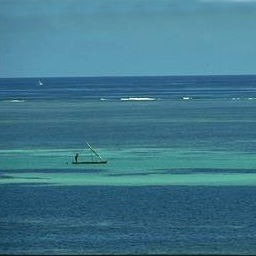

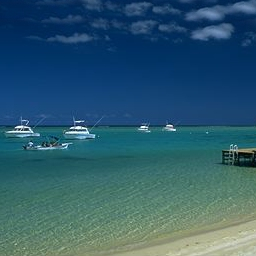

Similaridade= 0.76206195
-------


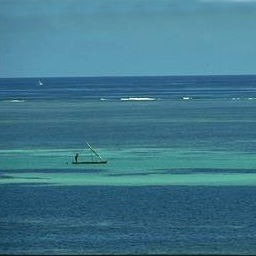

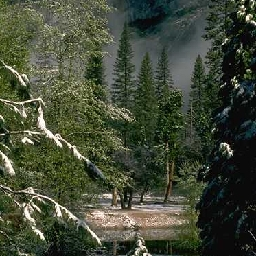

Similaridade= 0.6137764
-------


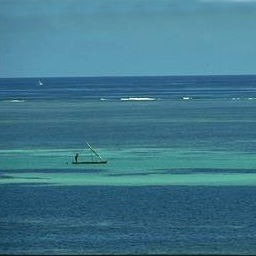

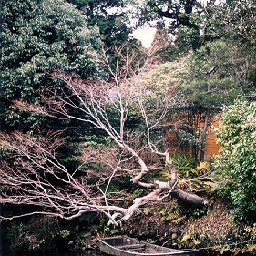

Similaridade= 0.5773263
-------


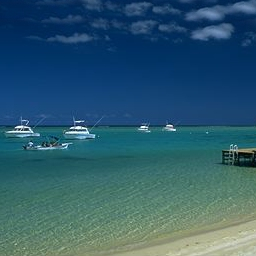

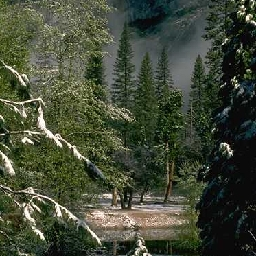

Similaridade= 0.5818674
-------


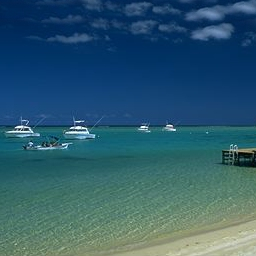

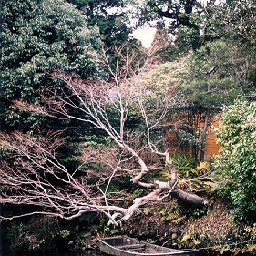

Similaridade= 0.57124454
-------


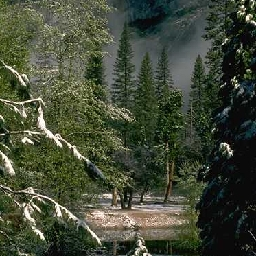

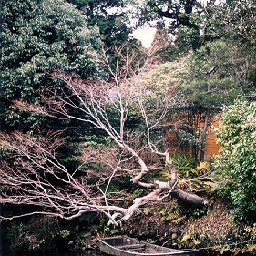

Similaridade= 0.7309833
-------


In [ ]:
for i in range(0, len(list_img)-1):
  for j in range(i+1,len(list_img)):
    a = ShowImage(filename=list_img[i],width=256) 
    b = ShowImage(filename=list_img[j],width=256) 
    display(a,b)
    print('Similaridade=',util.cos_sim(X[i], X[j]).numpy()[0][0])
    print('-------')

## Pré-processando a base de imagens

In [ ]:
df = pd.DataFrame(images)
df.columns = ['filename']
df

,filename
0,images/mountain_n860054.jpg
1,images/street_par54.jpg
2,images/insidecity_art1597.jpg
3,images/mountain_n344080.jpg
4,images/tallbuilding_urban787.jpg
...,...
95,images/opencountry_natu932.jpg
96,images/coast_natu813.jpg
97,images/coast_land108.jpg
98,images/street_art768.jpg


In [ ]:
X = []
for index,row in df.iterrows():
  img_features = image_feature_extractor.encode(Image.open(row['filename']))
  X.append(img_features)
df['features'] = X
df

,filename,features
0,images/mountain_n860054.jpg,"[0.08308858, 0.09059331, -0.23233178, -0.20474..."
1,images/street_par54.jpg,"[0.18686756, -0.0025264919, 0.08536047, -0.383..."
2,images/insidecity_art1597.jpg,"[-0.06839551, 0.033774823, 0.21158478, -0.0816..."
3,images/mountain_n344080.jpg,"[-0.6915642, 0.05646649, 0.36767706, 0.1515197..."
4,images/tallbuilding_urban787.jpg,"[-0.119449586, -0.13640155, 0.16242005, 0.4509..."
...,...,...
95,images/opencountry_natu932.jpg,"[-0.05203893, 0.2271687, 0.07438794, 0.2393568..."
96,images/coast_natu813.jpg,"[0.39966053, 0.037759982, 0.16781503, -0.12001..."
97,images/coast_land108.jpg,"[0.2865615, -0.028678, 0.56517863, 0.27634472,..."
98,images/street_art768.jpg,"[-0.40105027, 0.23730733, 0.22169964, 0.154450..."


# Experimentando agrupamento de imagens

Para o nosso teste (simples), vamos organizar as imagens em 15 grupos.

In [ ]:
kmeans = KMeans(n_clusters=15, random_state=1).fit(df['features'].to_list())
df['cluster'] = kmeans.labels_
df

,filename,features,cluster
0,images/mountain_n860054.jpg,"[0.08308858, 0.09059331, -0.23233178, -0.20474...",9
1,images/street_par54.jpg,"[0.18686756, -0.0025264919, 0.08536047, -0.383...",10
2,images/insidecity_art1597.jpg,"[-0.06839551, 0.033774823, 0.21158478, -0.0816...",13
3,images/mountain_n344080.jpg,"[-0.6915642, 0.05646649, 0.36767706, 0.1515197...",9
4,images/tallbuilding_urban787.jpg,"[-0.119449586, -0.13640155, 0.16242005, 0.4509...",12
...,...,...,...
95,images/opencountry_natu932.jpg,"[-0.05203893, 0.2271687, 0.07438794, 0.2393568...",14
96,images/coast_natu813.jpg,"[0.39966053, 0.037759982, 0.16781503, -0.12001...",4
97,images/coast_land108.jpg,"[0.2865615, -0.028678, 0.56517863, 0.27634472,...",8
98,images/street_art768.jpg,"[-0.40105027, 0.23730733, 0.22169964, 0.154450...",13


In [ ]:
df[df.cluster==5]

,filename,features,cluster
8,images/tallbuilding_urban649.jpg,"[-0.031072646, 0.089068785, 0.44662973, 0.0346...",5
19,images/tallbuilding_art945.jpg,"[-0.29937288, -0.020182751, 0.2484078, -0.2089...",5
30,images/tallbuilding_art101.jpg,"[-0.08571275, -0.15561266, 0.13978991, 0.06101...",5
47,images/tallbuilding_art392.jpg,"[-0.23928945, 0.17909172, 0.32569045, -0.08516...",5


images/coast_nat284.jpg


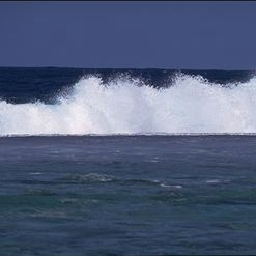

images/coast_land277.jpg


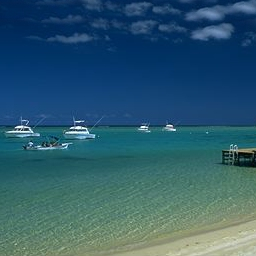

images/coast_nat109.jpg


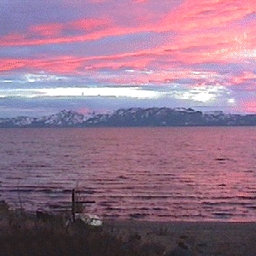

images/coast_land367.jpg


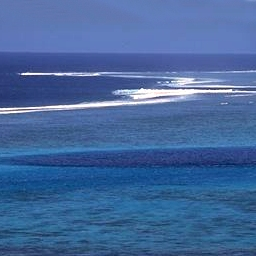

images/coast_land108.jpg


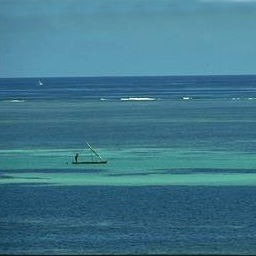

images/coast_n735016.jpg


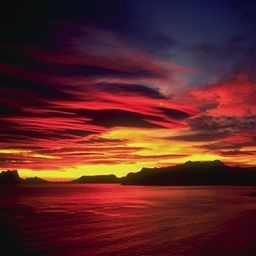

In [ ]:
# vamos visualizar as imagens de um grupo
cluster = 8
for index,row in df[df.cluster==cluster].iterrows():
  print(row['filename'])
  img = ShowImage(filename=row['filename'],width=256) 
  display(img)